## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  67.630615   352.943830  0.923268   5.758671  332.920249
1  97.249719  1114.762228  0.787159   5.647058  882.884719
2  94.571666   281.725309  0.250949   6.121653  118.119798
3  79.451064  1085.086130  0.130778  10.454410  162.428934
4   8.870716   829.496513  0.213374   1.259258  177.157004


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9568392	total: 69.5ms	remaining: 1m 9s
1:	learn: 0.9455030	total: 70.1ms	remaining: 35s
2:	learn: 0.9339016	total: 70.7ms	remaining: 23.5s
3:	learn: 0.9219947	total: 71.3ms	remaining: 17.7s
4:	learn: 0.9090984	total: 71.8ms	remaining: 14.3s
5:	learn: 0.8975556	total: 72.3ms	remaining: 12s
6:	learn: 0.8855658	total: 72.9ms	remaining: 10.3s
7:	learn: 0.8728846	total: 73.5ms	remaining: 9.11s
8:	learn: 0.8607000	total: 73.9ms	remaining: 8.13s
9:	learn: 0.8479950	total: 74.4ms	remaining: 7.36s
10:	learn: 0.8357216	total: 74.8ms	remaining: 6.72s
11:	learn: 0.8216491	total: 75.2ms	remaining: 6.19s
12:	learn: 0.8097643	total: 75.7ms	remaining: 5.75s
13:	learn: 0.7978567	total: 76.3ms	remaining: 5.37s
14:	learn: 0.7859558	total: 76.8ms	remaining: 5.04s
15:	learn: 0.7757415	total: 77.2ms	remaining: 4.75s
16:	learn: 0.7647563	total: 77.6ms	remaining: 4.49s
17:	learn: 0.7543798	total: 78.1ms	remaining: 4.26s
18:	learn: 0.7457831	total: 78.6ms	remaining: 4.

92:	learn: 0.3080872	total: 110ms	remaining: 1.07s
93:	learn: 0.3044819	total: 110ms	remaining: 1.06s
94:	learn: 0.3012034	total: 110ms	remaining: 1.05s
95:	learn: 0.2984239	total: 111ms	remaining: 1.04s
96:	learn: 0.2951921	total: 111ms	remaining: 1.04s
97:	learn: 0.2923256	total: 112ms	remaining: 1.03s
98:	learn: 0.2885118	total: 112ms	remaining: 1.02s
99:	learn: 0.2851458	total: 113ms	remaining: 1.01s
100:	learn: 0.2823658	total: 113ms	remaining: 1s
101:	learn: 0.2797945	total: 113ms	remaining: 998ms
102:	learn: 0.2769557	total: 114ms	remaining: 991ms
103:	learn: 0.2741571	total: 114ms	remaining: 985ms
104:	learn: 0.2710029	total: 115ms	remaining: 978ms
105:	learn: 0.2684018	total: 115ms	remaining: 971ms
106:	learn: 0.2657844	total: 116ms	remaining: 965ms
107:	learn: 0.2630426	total: 116ms	remaining: 960ms
108:	learn: 0.2610023	total: 117ms	remaining: 953ms
109:	learn: 0.2581081	total: 117ms	remaining: 947ms
110:	learn: 0.2556688	total: 118ms	remaining: 942ms
111:	learn: 0.2530874	t

271:	learn: 0.0761365	total: 187ms	remaining: 499ms
272:	learn: 0.0756409	total: 187ms	remaining: 498ms
273:	learn: 0.0752507	total: 188ms	remaining: 497ms
274:	learn: 0.0748253	total: 188ms	remaining: 495ms
275:	learn: 0.0744201	total: 188ms	remaining: 494ms
276:	learn: 0.0739526	total: 189ms	remaining: 493ms
277:	learn: 0.0734724	total: 189ms	remaining: 492ms
278:	learn: 0.0730313	total: 190ms	remaining: 490ms
279:	learn: 0.0725089	total: 190ms	remaining: 488ms
280:	learn: 0.0719858	total: 190ms	remaining: 487ms
281:	learn: 0.0715989	total: 191ms	remaining: 486ms
282:	learn: 0.0712255	total: 191ms	remaining: 484ms
283:	learn: 0.0708685	total: 191ms	remaining: 483ms
284:	learn: 0.0705048	total: 192ms	remaining: 482ms
285:	learn: 0.0700905	total: 192ms	remaining: 480ms
286:	learn: 0.0696765	total: 193ms	remaining: 480ms
287:	learn: 0.0693397	total: 193ms	remaining: 478ms
288:	learn: 0.0688596	total: 194ms	remaining: 477ms
289:	learn: 0.0685049	total: 194ms	remaining: 476ms
290:	learn: 

518:	learn: 0.0227432	total: 291ms	remaining: 270ms
519:	learn: 0.0226480	total: 291ms	remaining: 269ms
520:	learn: 0.0225367	total: 292ms	remaining: 268ms
521:	learn: 0.0224192	total: 292ms	remaining: 268ms
522:	learn: 0.0223536	total: 293ms	remaining: 267ms
523:	learn: 0.0222609	total: 293ms	remaining: 266ms
524:	learn: 0.0221398	total: 294ms	remaining: 266ms
525:	learn: 0.0220489	total: 294ms	remaining: 265ms
526:	learn: 0.0219855	total: 294ms	remaining: 264ms
527:	learn: 0.0218964	total: 295ms	remaining: 264ms
528:	learn: 0.0217823	total: 295ms	remaining: 263ms
529:	learn: 0.0216784	total: 296ms	remaining: 262ms
530:	learn: 0.0215665	total: 296ms	remaining: 261ms
531:	learn: 0.0214789	total: 296ms	remaining: 261ms
532:	learn: 0.0213658	total: 297ms	remaining: 260ms
533:	learn: 0.0212349	total: 297ms	remaining: 259ms
534:	learn: 0.0211490	total: 298ms	remaining: 259ms
535:	learn: 0.0210492	total: 298ms	remaining: 258ms
536:	learn: 0.0209396	total: 298ms	remaining: 257ms
537:	learn: 

692:	learn: 0.0127922	total: 368ms	remaining: 163ms
693:	learn: 0.0127549	total: 369ms	remaining: 163ms
694:	learn: 0.0127032	total: 369ms	remaining: 162ms
695:	learn: 0.0126673	total: 370ms	remaining: 162ms
696:	learn: 0.0126167	total: 370ms	remaining: 161ms
697:	learn: 0.0125804	total: 371ms	remaining: 160ms
698:	learn: 0.0125309	total: 371ms	remaining: 160ms
699:	learn: 0.0124966	total: 372ms	remaining: 159ms
700:	learn: 0.0124605	total: 372ms	remaining: 159ms
701:	learn: 0.0124121	total: 372ms	remaining: 158ms
702:	learn: 0.0123775	total: 373ms	remaining: 158ms
703:	learn: 0.0123301	total: 373ms	remaining: 157ms
704:	learn: 0.0122974	total: 374ms	remaining: 156ms
705:	learn: 0.0122510	total: 374ms	remaining: 156ms
706:	learn: 0.0122179	total: 374ms	remaining: 155ms
707:	learn: 0.0121725	total: 375ms	remaining: 155ms
708:	learn: 0.0121424	total: 375ms	remaining: 154ms
709:	learn: 0.0120979	total: 375ms	remaining: 153ms
710:	learn: 0.0120516	total: 376ms	remaining: 153ms
711:	learn: 

931:	learn: 0.0068043	total: 473ms	remaining: 34.5ms
932:	learn: 0.0067871	total: 474ms	remaining: 34ms
933:	learn: 0.0067664	total: 474ms	remaining: 33.5ms
934:	learn: 0.0067533	total: 474ms	remaining: 33ms
935:	learn: 0.0067329	total: 475ms	remaining: 32.5ms
936:	learn: 0.0067201	total: 475ms	remaining: 32ms
937:	learn: 0.0067087	total: 476ms	remaining: 31.4ms
938:	learn: 0.0066933	total: 476ms	remaining: 30.9ms
939:	learn: 0.0066804	total: 476ms	remaining: 30.4ms
940:	learn: 0.0066656	total: 477ms	remaining: 29.9ms
941:	learn: 0.0066569	total: 477ms	remaining: 29.4ms
942:	learn: 0.0066454	total: 478ms	remaining: 28.9ms
943:	learn: 0.0066258	total: 478ms	remaining: 28.4ms
944:	learn: 0.0066147	total: 479ms	remaining: 27.9ms
945:	learn: 0.0066033	total: 479ms	remaining: 27.3ms
946:	learn: 0.0065885	total: 479ms	remaining: 26.8ms
947:	learn: 0.0065694	total: 480ms	remaining: 26.3ms
948:	learn: 0.0065569	total: 480ms	remaining: 25.8ms
949:	learn: 0.0065446	total: 481ms	remaining: 25.3ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

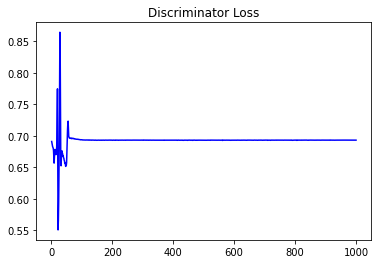

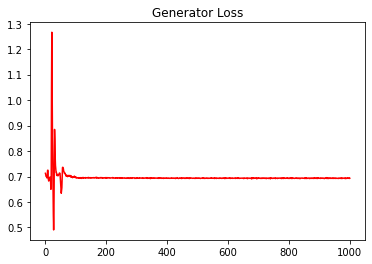

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0196438242382583


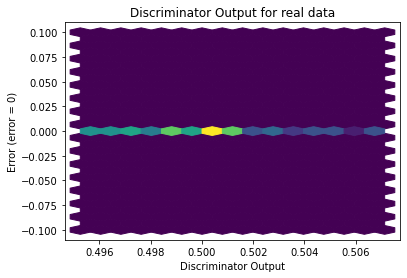

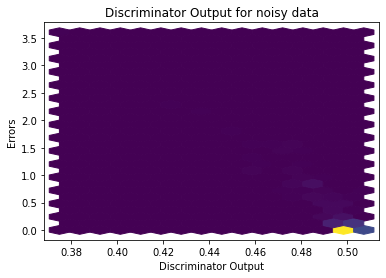

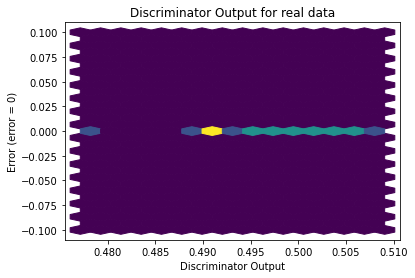

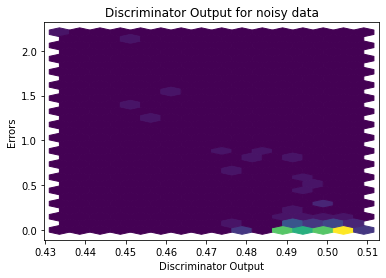

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


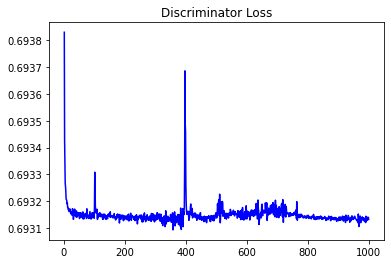

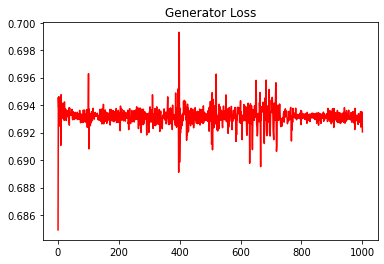

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.03603989815100341


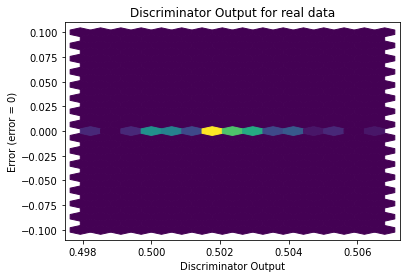

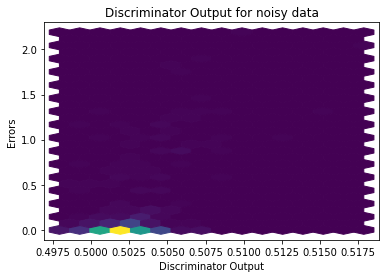

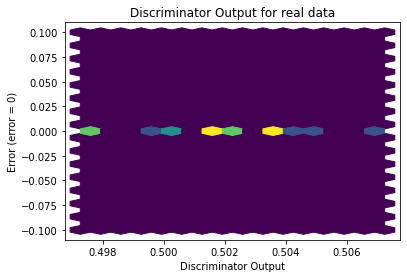

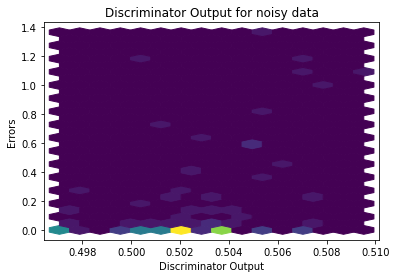

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
